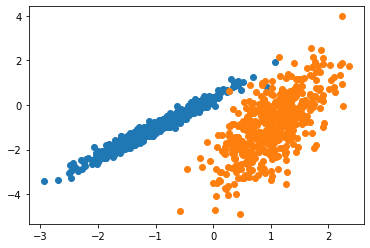

In [3]:
#https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097
#https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
#https://machinelearningmastery.com/clustering-algorithms-with-python/
'''
Comparision of Clustering algorithms: https://scikit-learn.org/stable/modules/clustering.html
Outlier detection: https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html
'''
from sklearn.datasets import make_classification
from numpy import where
import matplotlib.pyplot as plt

plt.figure()
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples (2 features)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()

#Clusters = 25
Clusters = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


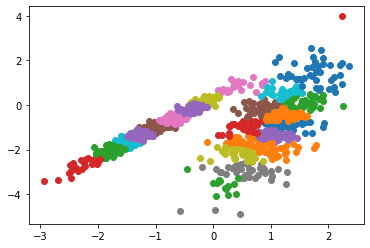

In [2]:
# Affinity Propagation
'''
We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points.
Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges
'''

from sklearn.cluster import AffinityPropagation
from numpy import unique

# define the model
model = AffinityPropagation(damping=0.9, random_state=None)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, I could not achieve a good result.

#Clusters = 2
Clusters = [0 1]


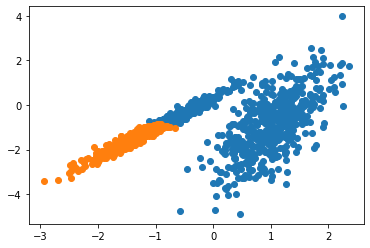

In [3]:
'''
Agglomerative Clustering:
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.
It is a part of a broader class of hierarchical clustering methods
'''
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, a reasonable grouping is found.

#Clusters = 2
Clusters = [0 1]


[]

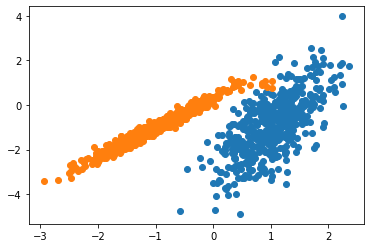

In [4]:
'''
BIRCH
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

BIRCH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce the 
best quality clustering with the available resources (i. e., available memory and time constraints).
'''

from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.plot()
#In this case, an excellent grouping is found.

#Clusters = 3
Clusters = [-1  0  1]


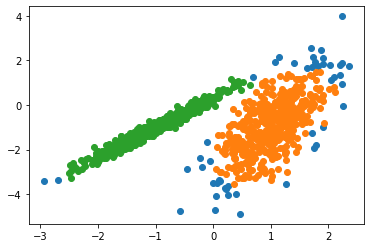

In [5]:
'''
DBSCAN
DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding 
high-density areas in the domain and expanding those areas of the feature space around them as clusters.

We present the new clustering algorithm DBSCAN relying on a density-based notion of clusters which is designed to discover 
clusters of arbitrary shape. DBSCAN requires only one input parameter and supports the user in determining an appropriate 
value for it
'''

from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.30, min_samples=9)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, a reasonable grouping is found, although more tuning is required.

#Clusters = 2
Clusters = [0 1]


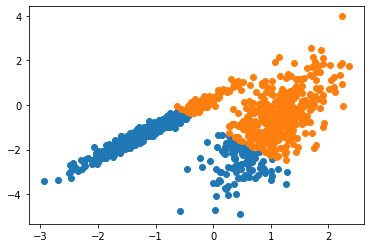

In [6]:
'''
K-Means
K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an 
effort to minimize the variance within each cluster.

The main purpose of this paper is to describe a process for partitioning an N-dimensional population into k sets on the 
basis of a sample. The process, which is called ‘k-means,’ appears to give partitions which are reasonably efficient in 
the sense of within-class variance.
'''
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, a reasonable grouping is found, although the unequal equal variance in each dimension makes the method less suited to this dataset.

#Clusters = 2
Clusters = [0 1]


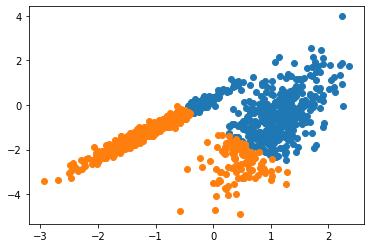

In [10]:
'''
Mini-Batch K-Means
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of 
samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to 
statistical noise.
'''
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters = 2)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(cluster == yhat)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, a result equivalent to the standard k-means algorithm is found.

#Clusters = 3
Clusters = [0 1 2]


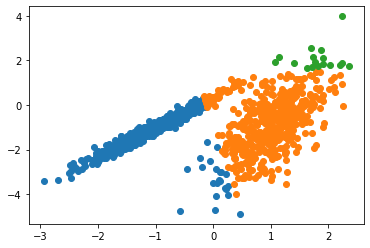

In [11]:
'''
Mean Shift
Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

We prove for discrete data the convergence of a recursive mean shift procedure to the nearest stationary point of the 
underlying density function and thus its utility in detecting the modes of the density.
'''
from sklearn.cluster import MeanShift

model = MeanShift()
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(cluster == yhat)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, a reasonable set of clusters are found in the data.

#Clusters = 17
Clusters = [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


<Figure size 432x288 with 0 Axes>

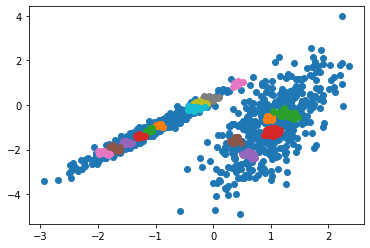

<Figure size 432x288 with 0 Axes>

In [13]:
'''
OPTICS
OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version 
of DBSCAN described above.

We introduce a new algorithm for the purpose of cluster analysis which does not produce a clustering of a data set 
explicitly; but instead creates an augmented ordering of the database representing its density-based clustering structure. 
This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a 
broad range of parameter settings.
'''

from sklearn.cluster import OPTICS
model = OPTICS(eps=0.9, min_samples=10)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.figure()
#In this case, I could not achieve a reasonable result on this dataset.

#Clusters = 2
Clusters = [0 1]


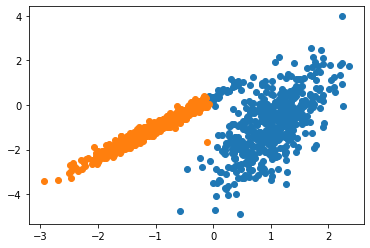

In [15]:
'''
Spectral Clustering
Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

A promising alternative that has recently emerged in a number of fields is to use spectral methods for clustering. 
Here, one uses the top eigenvectors of a matrix derived from the distance between points.
'''

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, reasonable clusters were found.

#Clusters = 2
Clusters = [0 1]


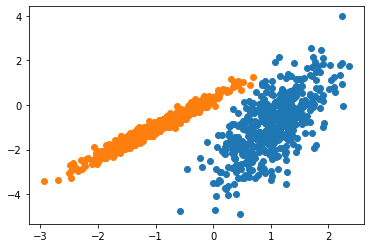

In [19]:
'''
Gaussian Mixture Model
A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability 
distributions as its name suggests.
'''

from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 2)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
print("#Clusters =", len(clusters))
print("Clusters =", clusters)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.draw()
#In this case, we can see that the clusters were identified perfectly. This is not surprising given that the dataset 
#was generated as a mixture of Gaussians.